# Chapter 5 - Differential Equations (Assignment 9)

## Authors: 
Matthew Bouchard (30003689) \\
Siegfried Peschke (30032136) \\
Chris Godek (30030527)

In [0]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import random
from matplotlib import animation, rc

## Problem 1

Write a program to solve the 1D homogeneous Poisson equation, using the finite-difference approximation to the second derivative, subject to the boundary conditions $V(0)=0$ and $V(1)=1$ in the interval $0\leq x\leq 1$. Use a random initial state and the iterative method discussed above. Make a movie to show the approach to convergence; I use animation.ArtistAnimation. Check that the answer is correct.

To start, we will generate a random array that we will smooth over using the finite-difference approximation. Please note that we have some requirements for the random array. The first entry in this array must be 0, whereas the last must be 1. As such, all values inbetween these entries (N-2) will be a random value. We can generate this array with the following function:

In [0]:
def array_generat3r(N):

  """

  -- General Description --

  This function creates a random array of values (between 0 and 1) of length N.
  We have imposed boundary conditions so that the first entry is always equivalent
  to 0 and the final entry is always equivalent to 1.

  -- Arguments --

  N = The length of the random array

  """

  random_array = []
  x_axis = [] # This will be used for printing statements

  for i in range(N): # Creating random values inbetween the array
    random_array.append(np.random.rand())

  # Imposing boundary conditions
  random_array[0] = 0
  random_array[-1] = 1

  # Generating an x_axis array for plotting in the future
  step = 1/(N)
  for val in np.arange(0,1,step):
    x_axis.append(val)

  return random_array , x_axis

In [0]:
# Allow to call the function to make sure we are producing a 'random' array
V = array_generat3r(5)[0]
print(V)

[0, 0.7771521084912577, 0.5175701355991349, 0.7949130275233648, 1]


Now, allow us to generate the second derivative approximation function. The second derivative in this context can be approximated by utilizing the following equation:

$$
V(x)=\frac{V(x+a)+V(x-a)}{2}.
$$

As such, allow us to start by defining a function that will perform this operation. I.e taking the value from the left/right of your position and averaging them as that new point.

In [0]:
def derivat3r(V_initial):

  """
  -- General Description --

  -- Arguments --

  V_initial  = The random function for which we wish to calculate the derivative

  """

  V_prime = [] # List following differentiation
  count = 0 # Used to index through our list

  while count < len(V_initial):
    if count == 0: # If we are at the first point in the array append 0 (boundary conditions)
      V_prime.append(0)

    elif count == (len(V_initial)-1): # If we are at last point append 1 (boundary conditions)
      V_prime.append(1)

    elif count >= 1 and count <= (len(V_initial)-2):
      #print(count) 
      averaged = (V_initial[count+1] + V_initial[count-1])/2
      V_prime.append(averaged)

    count += 1 # Move to the next iteration in the list

  return V_prime

In [0]:
# Checking to see if the function works as expected
V_p = derivat3r(V)
print(V_p)

[0, 0.25878506779956745, 0.7860325680073112, 0.7587850677995674, 1]


Allow us to plot the difference between the original array and first derivative very quickly to get a sense of what is going on:

In [0]:
Plot = array_generat3r(100)
Derivative = derivat3r(Plot[0])

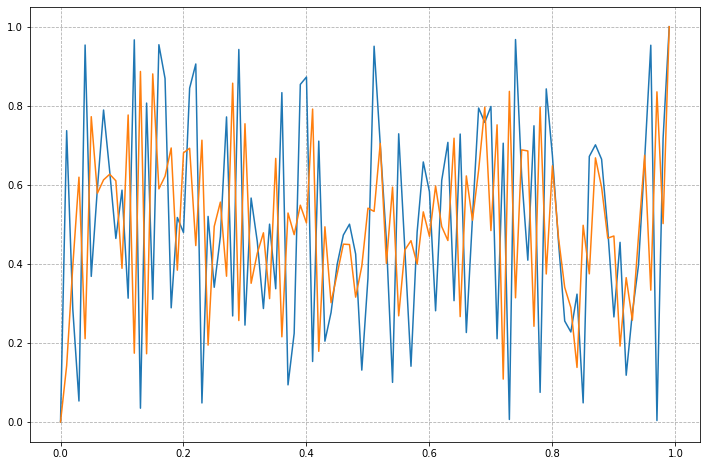

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
#plt.title('Mean Internal Energy as a function of T for Ising model')
plt.grid(linestyle='dashed')

#Plot the Function

plt.plot(Plot[1],Plot[0])
plt.plot(Plot[1],Derivative)

#Legend Settings
#legend = plt.legend(loc = 4, shadow = 'true')
#frame = legend.get_frame()
#frame.set_alpha(0.8)

Now, we wish to perform this process multiple time until we have a somewhat linear function. As such, allow us to perform "N" derivatives until our function lands within an acceptable tolerance. We can do this with the following function:

In [0]:
def iterat3d_derivat3r(V_initial , tol):

  """

  -- General Description --

  -- Arguments --
  V_initial = The initial array
  tol = Some tolerance for which the function will stop (total sum of difference
  between old and new derivative)

  """

  array = V_initial
  count = 0

  while count < 100000:
    derivative = derivat3r(array)
    test = []

    # testing to see if we can stop running the function:
    for i,j in zip(derivative,array): # Checking the difference between each element
      test.append(np.abs(i-j))
    if sum(test) <  tol: # If the total error is < tol then break
      break

    array = derivative
    count += 1

  return array,count

In [0]:
# Testing our function
test = array_generat3r(100)[0]
result = iterat3d_derivat3r(test,0.0001)

In [0]:
print('It took',result[1],'Iterations to reach the expected result')

It took 19224 Iterations to reach the expected result


And finally, we can plot the results as follows:

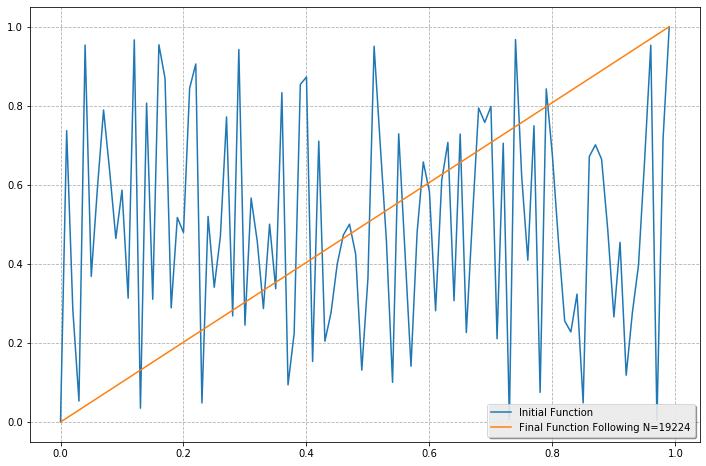

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
#plt.title('Mean Internal Energy as a function of T for Ising model')
plt.grid(linestyle='dashed')

#Plot the Function

plt.plot(Plot[1],Plot[0],label='Initial Function')
plt.plot(Plot[1],result[0],label='Final Function Following N=' + str(result[1]))

#Legend Settings
legend = plt.legend(loc = 4, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

Now that we have completed our task, we can move ahead and attempt to create a dynamic plot. 

In [0]:
# - The capture command prevents plotting of the additional figure to clean up output -
%%capture 

fig = plt.figure()

# Generating initial values
V, xvals = array_generat3r(100)# Generating the initial random array
array = derivat3r(V) # Taking the initial derivative

iterations = 8000 # Doing less that ideal number of iterations to shorten plot time
ims = []

for iter in range(iterations): # Going through the expected number of iterations

    derivative = derivat3r(array) # Taking derivative
    array = derivative # Re-assigning old derivative as the new
    
    if (iter % 100 == 0 or iter<50): # Only plotting every 100th step
        im = plt.plot(xvals,array,color='black')
        ims.append(im)

ani = animation.ArtistAnimation(fig, ims)

# Here is information to save the figure if wanted 
# ani.save('potential0to1.mp4')
rc('animation', html='html5')

In [0]:
ani

Using Mathematica we show that the solution to:

$$\frac{d^2 f(x)}{d x^2}=0,$$

is given by the following equation:

$$ V(x) = c_2 x + c_1$$

Where $c_2$ and $c_1$ are both constants. Recall that we have been given initial conditions defined by: 

$$
V(0) = 0 \: and \: V(1) = 1
$$

As such, we can use these to delinate a value for our constants:

$$
V(0) = 0 = c_2(0) + c_1 \rightarrow c_1 = 0
$$

and following the same logic for $V(1)$:

$$
V(1) = 1 = c_2(1) \rightarrow c_2 = 1
$$

As such, the solution to our differential equation is given by:

$$
\boxed{y=x}
$$

Which is exactly what is given by our plots above and animation.

## Question 2:

Now write a program to solve the 1D inhomogeneous Poisson equation, using the finite-difference approximation to the second derivative, subject to the boundary conditions $V(0)=0$ and $V(1)=0$ in the interval $0\leq x\leq 1$. Assume that the source term has a Gaussian form,
$$\rho(x)=10e^{-100(x-1/2)^2}.$$
Again, make a movie to show the approach to convergence. Check that the answer is correct; using Mathematica, I obtained the result
$$V(x)=\frac{e^{-100(x-1/2)^2}}{20}+\frac{\sqrt{\pi}}{4}\left[(1-2x)\mbox{Erf}(5-10x)-\mbox{Erf}(5)\right],$$
where 
$$\mbox{Erf}(z)\equiv\frac{2}{\sqrt{\pi}}\int_0^ze^{-t^2}dt.$$

We can solve the inhomogeneous Poisson equation by utilizing the following expression:

$$
\frac{d^2 V(x)}{d x^2}=\frac{V(x+a)+V(x-a)-2V(x)}{a^2}=\rho(x)
$$

Which can be re-arranged to isolate for V(x):

$$
V(x_j)=\frac{V(x_j+a)+V(x_j-a)-a^2\rho(x_j)}{2}
$$

Please note that $a$ is equivalent to the seperation distance between adjacent points. So if we are moving from $0 \rightarrow 1$ in 100 steps then our value of $a$ will be equivalent to 0.01. As such, we can essentiall follow the same procedure as in question 1, but with adding the $\rho$ term. Which is given by the following:

$$
\rho(x) = 10e^{-100(x_j-1/2)^2}
$$

Which thereby gives us the final expression that will be used in our functions below:

$$
V(x_j)=\frac{V(x_j+a)+V(x_j-a)-a^210e^{-100(x_j-1/2)^2}}{2}
$$

As such, allow us to start by generating a function that will determine $\rho(x_j)$ for us:


In [0]:
def rho(x):

  """
  
  -- Arguments --

  x = The value of x for which you are situated 

  """

  return 10*np.exp(-100*(x-(1/2))**2)

And now, we can use this to define the function that will compute a step in the Nonlinear differential equation.


In [0]:
def Nonlinear_derivat3r(V_initial,X_list):

  """
  -- General Description --

  -- Arguments --

  V_initial  = The random function for which we wish to calculate the derivative

  """

  # Calculating value of "a"
  a = 1/len(V_initial)

  # Values for storage
  V_prime = [] # List following differentiation
  count = 0 # Used to index through our list

  while count < len(V_initial):
    if count == 0: # If we are at the first point in the array append 0 (boundary conditions)
      V_prime.append(0)

    elif count == (len(V_initial)-1): # If we are at last point append 1 (boundary conditions)
      V_prime.append(0)

    elif count >= 1 and count <= (len(V_initial)-2):
      #print(count) 
      averaged = (V_initial[count+1] + V_initial[count-1] - (a**2)*(rho(X_list[count])))/2
      V_prime.append(averaged)

    count += 1 # Move to the next iteration in the list

  return V_prime

And now, we wish to perform this operation multiple times until we reach a desired tolerance:

In [0]:
def Nonlinear_iterat3d_derivat3r(V_initial , X_List, tol):

  """

  -- General Description --

  This function will perform multiple iterations for the nonlinear approximaation.

  -- Arguments --

  V_initial = The initial array
  tol = Some tolerance for which the function will stop (total sum of difference
  between old and new derivative)

  """

  array = V_initial
  count = 0

  while count < 10000:
    derivative = Nonlinear_derivat3r(array,X_List)
    test = []

    # testing to see if we can stop running the function:
    for i,j in zip(derivative,array): # Checking the difference between each element
      test.append(np.abs(i-j))
    if sum(test) <  tol: # If the total error is < tol then break
      break

    array = derivative
    count += 1

  return array,count

In [0]:
# Testing our function and storing values for printing
V_vals , X_vals = array_generat3r(100)
Nonlinear_Result ,counts = Nonlinear_iterat3d_derivat3r(V_vals , X_vals , 1e-5)

As such, we can plot the final result as follows:

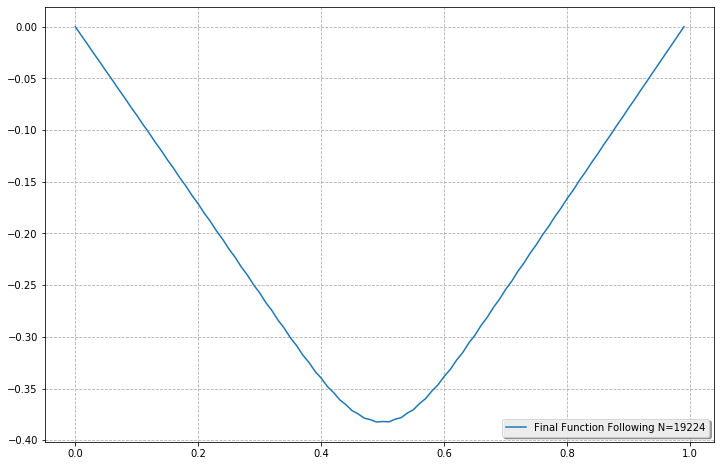

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
#plt.title('Mean Internal Energy as a function of T for Ising model')
plt.grid(linestyle='dashed')

#Plot the Function
#plt.plot(X_vals,V_vals,label='Initial Function')
plt.plot(X_vals,Nonlinear_Result,label='Final Function Following N=' + str(result[1]))

#Legend Settings
legend = plt.legend(loc = 4, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

And we can animate the process using the following code:

In [0]:
# - The capture command prevents plotting of the additional figure to clean up output -
%%capture 

fig = plt.figure()

# Generating initial values
V_vals , X_vals = array_generat3r(100)# Generating the initial random array
array = Nonlinear_derivat3r(V_vals,X_vals) # Taking the initial derivative

iterations = 8000 # Doing less that ideal number of iterations to shorten plot time
ims = []

for iter in range(iterations): # Going through the expected number of iterations

    derivative = Nonlinear_derivat3r(array,X_vals) # Taking derivative
    array = derivative # Re-assigning old derivative as the new
    
    if (iter % 100 == 0 or iter<50): # Only plotting every 100th step
        im = plt.plot(xvals,array,color='black')
        ims.append(im)

nonlinear_ani = animation.ArtistAnimation(fig, ims)

# Here is information to save the figure if wanted 
# ani.save('potential0to1.mp4')
rc('animation', html='html5')

In [0]:
nonlinear_ani

Now, our final task for this question is to compare our result to an expected value. Using Mathematica it can be shown that result is equivalent to the following: 

$$
\boxed{V(x)=\frac{e^{-100(x-1/2)^2}}{20}+\frac{\sqrt{\pi}}{4}\left[(1-2x)\mbox{Erf}(5-10x)-\mbox{Erf}(5)\right]}
$$

where 

$$
\mbox{Erf}(z)\equiv\frac{2}{\sqrt{\pi}}\int_0^ze^{-t^2}dt
$$

Now, instead of spending an absurd amount of time attempting to determine this integral, we can make use of scipy.special.erf. This will allow us to make a simple function that determines $V$ for a given $x$:

In [0]:
def expected_nonlin3ar(x_values):

  """

  -- Arguments -- 
  x_values = The list of x_values for which we will calculate V(x)

  """

  V_list = [] # Storing values of V for plotting 

  # Calculating V(x)
  for x in x_values:
    V = np.exp(-100*(x-1/2)**2)/(20) + (np.sqrt(np.pi)/4)*((1-2*x)*sp.erf(5-10*x) - sp.erf(5))
    V_list.append(V)

  return V_list

Now, we can use this to compare the expected plot vs. our derived plot:

In [0]:
# Generating expected values
expected_vals = expected_nonlin3ar(X_vals)

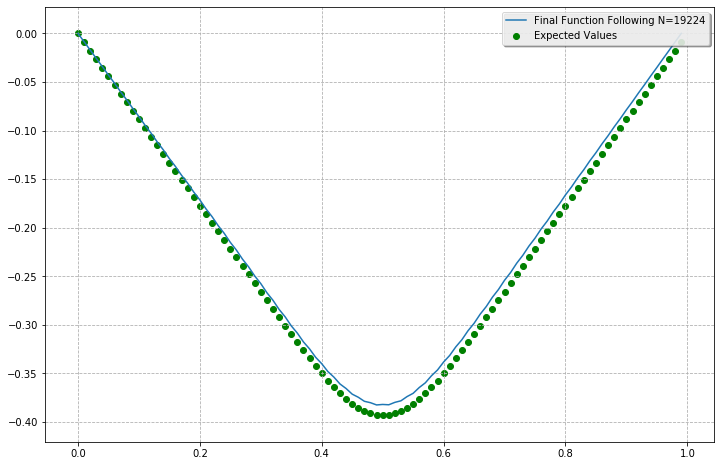

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
#plt.title('Mean Internal Energy as a function of T for Ising model')
plt.grid(linestyle='dashed')

#Plot the Function
plt.scatter(X_vals,expected_vals,label='Expected Values',color='Green')
plt.plot(X_vals,Nonlinear_Result,label='Final Function Following N=' + str(result[1]))

#Legend Settings
legend = plt.legend(loc = 1, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

And as we can see, we have recieved the same general trends. I am sure that if we were to increase the tolerance on our expected values that would significantly increase the accuracy of this plot. But we will emit high tolerance for brevity.

# Question 3

### Solve problems 1 and 2 above, but now by encoding the finite-difference approximation to the second derivative as a tridiagonal matrix. Use a linear system solver for both problems, and direct matrix inversion for tackling the inhomogenous differential equation in problem 2. Again make a movie of the approach to convergence.

### Part A: Homogeneous Linear Differential Equation

In this problem, we have been tasked with solving the following system of equations:

$$
\begin{pmatrix}
1 & 0 & 0 & 0 &\cdots & 0\cr
1 & -2 & 1& 0 & \cdots & 0\cr
0 & 1 & -2 & 1 & \cdots & 0 \cr
\vdots & \vdots & \vdots & \vdots & \ddots \cr
0 & 0 & 0 & 0 & \cdots & 1\cr
\end{pmatrix} \cdot \begin{pmatrix}
V_1 \cr
V_2 \cr
V_3 \cr
\vdots \cr
V_N
\end{pmatrix} = \begin{pmatrix}
0 \cr
0 \cr
0 \cr
\vdots \cr
1
\end{pmatrix}
$$

Where we can define each matrix as the following:

$$
M = \begin{pmatrix}
1 & 0 & 0 & 0 &\cdots & 0\cr
1 & -2 & 1& 0 & \cdots & 0\cr
0 & 1 & -2 & 1 & \cdots & 0 \cr
\vdots & \vdots & \vdots & \vdots & \ddots \cr
0 & 0 & 0 & 0 & \cdots & 1\cr
\end{pmatrix}
$$

Which is the coefficient multiplication matrix, and:

$$
V = \begin{pmatrix}
V_1 \cr
V_2 \cr
V_3 \cr
\vdots \cr
V_N
\end{pmatrix}
$$

Is the potential column vector, and:

$$
R = \begin{pmatrix}
0 \cr
0 \cr
0 \cr
\vdots \cr
1
\end{pmatrix}
$$

is the resultant matrix (i.e what should be returned when we multiply M and N. Please note that the final value in vector R is equivalent to 1 because of the following boundary condition:

$$
V(1) = 1
$$

and the first and last rows of matrix M have ones in the first and last entries (resepctively) to satisfy both the boundary condition above and:

$$
V(0) = 0
$$

As such, allow us to start this problem by generating the R matrix:

In [0]:
def column_v3ctor(N, Final_Element):

  """

  - Arguments - 

  N = The length of your column vector
  Final_Element = Last element of the matrix (used for period boundary conditions)

  """
  vector = np.zeros(N)
  vector[-1] = Final_Element

  return vector # Making a column vector of zeros

In [0]:
# Checking that we produce a proper vector
Vec = column_v3ctor(5,1)
print(Vec)

[0. 0. 0. 0. 1.]


Now, allow us to generate our coefficient multiplication matrix (M) for some size N. 

In [0]:
def MRTRIX_Generat3r(N):

  """

  """

  M = [] # The final matrix we will be returning

  # Generating the first row of the matrix
  r1 = np.zeros(N)
  r1[0] = 1
  M.append(r1)

  # Generating the inbetween rows of the matrix
  r2 = np.zeros(N)
  r2[0],r2[1], r2[2] = 1 , -2 , 1
  M.append(r2)

  for i in range(N-3):
    r = np.roll(r2,1)
    r2 = r
    M.append(r)

  # Generating the last row of the matrix
  rN = np.zeros(N)
  rN[-1] = 1
  M.append(rN)

  return M

In [0]:
# Testing to see if we get the expected output
MRTRIX_Generat3r(5)

[array([1., 0., 0., 0., 0.]),
 array([ 1., -2.,  1.,  0.,  0.]),
 array([ 0.,  1., -2.,  1.,  0.]),
 array([ 0.,  0.,  1., -2.,  1.]),
 array([0., 0., 0., 0., 1.])]

Now that all the work has been completed, we can solve the following system of equations:

$$
Mv = R
$$

Which can be done easily through the use of Numpy's function: linalg.solve. As such:

In [0]:
# Producing Y-values
y_values_lin = np.linalg.solve(MRTRIX_Generat3r(100),column_v3ctor(100,1))

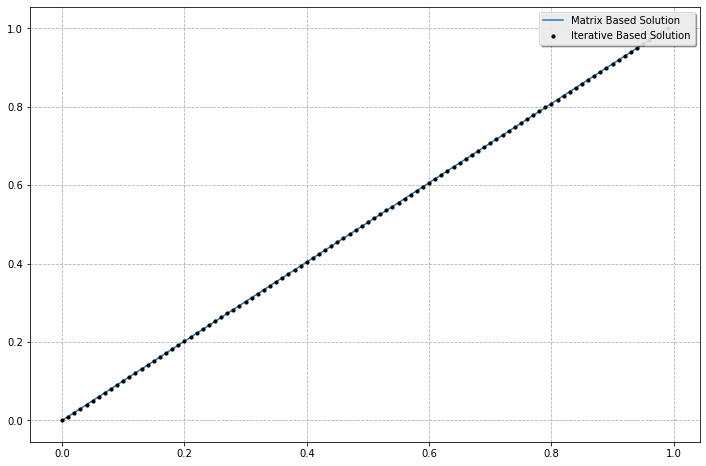

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
#plt.title('Mean Internal Energy as a function of T for Ising model')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(X_vals,y_values_lin,label='Matrix Based Solution')
plt.scatter(Plot[1],result[0],label='Iterative Based Solution', color = 'black',s=10,zorder=3)

#Legend Settings
legend = plt.legend(loc = 1, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

And as we can see, both solutions overlap perfectly. Thereby, this version of the 'matrix method' works as expected - and required MUCH less computational time.

### Part B: Non-linear Differential Equation

In this problem, we have been tasked with solving the following system of equations:

$$
\begin{pmatrix}
1 & 0 & 0 & 0 &\cdots & 0\cr
1 & -2 & 1& 0 & \cdots & 0\cr
0 & 1 & -2 & 1 & \cdots & 0 \cr
\vdots & \vdots & \vdots & \vdots & \ddots \cr
0 & 0 & 0 & 0 & \cdots & 0\cr
\end{pmatrix} \cdot \begin{pmatrix}
V_1 \cr
V_2 \cr
V_3 \cr
\vdots \cr
V_N
\end{pmatrix} = a^2 \begin{pmatrix}
\rho_1 \cr
\rho_2 \cr
\rho_3 \cr
\vdots \cr
\rho_N
\end{pmatrix}
$$

Where we can define each matrix as the following:

$$
M = \begin{pmatrix}
1 & 0 & 0 & 0 &\cdots & 0\cr
1 & -2 & 1& 0 & \cdots & 0\cr
0 & 1 & -2 & 1 & \cdots & 0 \cr
\vdots & \vdots & \vdots & \vdots & \ddots \cr
0 & 0 & 0 & 0 & \cdots & 1\cr
\end{pmatrix}
$$

Which is the coefficient multiplication matrix, and:

$$
V = \begin{pmatrix}
V_1 \cr
V_2 \cr
V_3 \cr
\vdots \cr
V_N
\end{pmatrix}
$$

Is the potential column vector, and:

$$
\begin{pmatrix}
\rho_1 \cr
\rho_2 \cr
\rho_3 \cr
\vdots \cr
\rho_N
\end{pmatrix}
$$

is the resultant matrix (i.e what should be returned when we multiply M and N. Each value of $\rho$ may be calculated by using the following expression:


$$
\rho(x_i)=10e^{-100(x-1/2)^2}
$$

Now, to satisfy the boundary conditions for this problem:

$$ 
V(0) = 0 \: and \: V(1) = 0
$$

We must set the first and last rows of the coefficient matrix to be equivalent to zeros. As such, allow us to start by making our new R vector:

In [0]:
def rho_v3ctor(N,xvals):

  """

  -- Arguments --
  N = The size of the column vector
  X_values = to be used for the column vector

  """

  vector = []

  for x in xvals:
    rho = 10*np.exp(-100*(x-(1/2))**2)
    vector.append(rho)
  return vector

In [0]:
# Testing function
N = 100
M_nonlin = rho_v3ctor(N,X_vals)

Now, we need to multiply this vector by $a^2$ to account for the non-linear solution:

In [0]:
a2 = (1/N)**2
Mcorrected_vals = []
for x in M_nonlin:
  M_non_corrected = x*a2
  Mcorrected_vals.append(M_non_corrected)

In [0]:
# Producing Y-values
y_nolin_values = np.linalg.solve(MRTRIX_Generat3r(100),Mcorrected_vals)

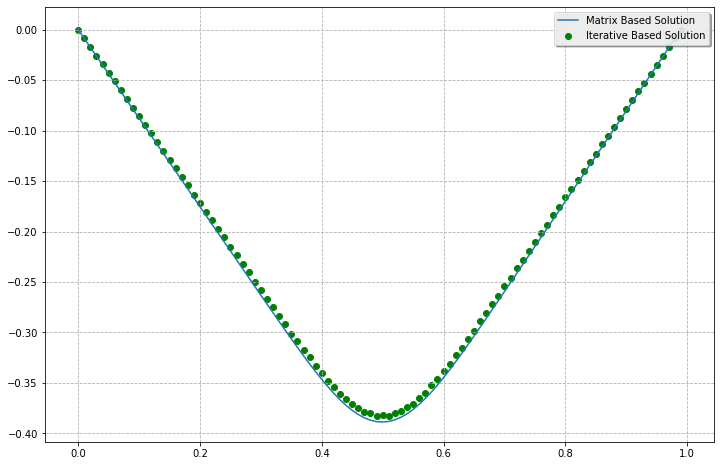

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
#plt.title('Mean Internal Energy as a function of T for Ising model')
plt.grid(linestyle='dashed')

#Plot the Function

plt.plot(X_vals,y_nolin_values,label='Matrix Based Solution')
plt.scatter(X_vals,Nonlinear_Result,label='Iterative Based Solution',color = 'green')



#Legend Settings
legend = plt.legend(loc = 1, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

And there we have it, our Matrix based solution is roughly synonomous with the iterative based solution! However,the matrix based solution is MUCH faster than using the iterative method.

## Question 4

Again solve problems 1 through 3, but now using a 5-point stencils
$$
f'(x)=\frac{-f(x+2a)+8f(x+a)-8f(x-a)+f(x-2a)}{12a}
$$

and

$$
f''(x)=\frac{-f(x+2a)+16f(x+a)-30f(x)+16f(x-a)-f(x-2a)}{12a^2}
$$

for the finite difference approximation to both the first and second derivatives, respectively; this higher-order stencil has a higher accuracy / lower error. Compare the results with those obtained previously. In particular, you may find that the solution to problems 1 and 2 becomes unstable. Find a method to restore stability while keeping the higher accuracy. 

### Part A: Linear Differential Equation 

#### Iterative Method

For the linear differential equation, it is possible for us to make the following statement:

$$
f''(x)=\frac{-f(x+2a)+16f(x+a)-30f(x)+16f(x-a)-f(x-2a)}{12a^2} = 0
$$

And we can re-arrange for $f(x)$ as follows:

$$
\boxed{f(x) = \frac{-f(x+2a)+16f(x+a)+16f(x-a)-f(x-2a)}{30}}
$$

As such, allow us to define a function that will perform this operation for us! Please note that in the second list item (and second to last item) I will ignore two problematic terms, the (x-2a) and (x+2a) functions respectively. The reason for this is that they will create an outside of bounds error.

In [0]:
def accurate_derivat3r(V_initial):

  """
  -- General Description --

  -- Arguments --

  V_initial  = The random function for which we wish to calculate the derivative

  """
  
  V_prime = [] # List following differentiation
  V_prime_smoothed = [] # Final smoothed function
  a = 1/len(V_initial)
  count = 0 # Used to index through our list

  while count < len(V_initial):
    if count == 0: # If we are at the first point in the array append 0 (boundary conditions)
      V_prime.append(0)

    elif count == (len(V_initial)-1): # If we are at last point append 1 (boundary conditions)
      V_prime.append(1)

    elif count == 1:
      averaged1 = averaged = (V_initial[count+1] + V_initial[count-1])/2
      V_prime.append(averaged1)

    elif count == (len(V_initial)-2):
      averaged2 = averaged = (V_initial[count+1] + V_initial[count-1])/2
      V_prime.append(averaged2)

    elif count >= 2 and count <= (len(V_initial)-3):
      #print(count) 
      averaged3 = (16*V_initial[count+1] + 16*V_initial[count-1] - V_initial[count-2] - V_initial[count+2])/30
      V_prime.append(averaged3)

    count += 1 # Move to the next iteration in the list

  # -- Smoothing the function for all values in V_prime --
  count2 = 0

  while count2 < (len(V_prime)):
    if count2 == 0:
      V_prime_smoothed.append(0)

    elif count2 == (len(V_prime)-1):
      V_prime_smoothed.append(1)
      
    elif count2 >= 1 and count2 <= (len(V_initial)-2):
      smoothed = (V_prime[count2-1] + V_prime[count2+1] + V_prime[count2])/3
      V_prime_smoothed.append(smoothed)

    count2 += 1

  return V_prime_smoothed

In [0]:
# Storing values for plotting and saving data to make sure that the "derivative" function worked as expected
yval, xval = array_generat3r(100)
single = accurate_derivat3r(yval)
#print(single)

And again we will define a function that will perform multiple derivatives:

In [0]:
def accurate_iterat3d_derivat3r(V_initial , tol):

  """

  -- General Description --

  -- Arguments --
  V_initial = The initial array
  tol = Some tolerance for which the function will stop (total sum of difference
  between old and new derivative)

  """

  array = V_initial
  count = 0

  while count < 10000:
    derivative = accurate_derivat3r(array)
    test = []

    # testing to see if we can stop running the function:
    for i,j in zip(derivative,array): # Checking the difference between each element
      test.append(np.abs(i-j))
    if sum(test) <  tol: # If the total error is < tol then break
      break

    array = derivative
    count += 1

  return array,count

Now, allow us to store some values and plot everything so that we can see if our results for the 5-point stencil are similar or equivalent to that of the 3-point stencil.

In [0]:
yval1 , counts1 = accurate_iterat3d_derivat3r(yval , 1e-5)

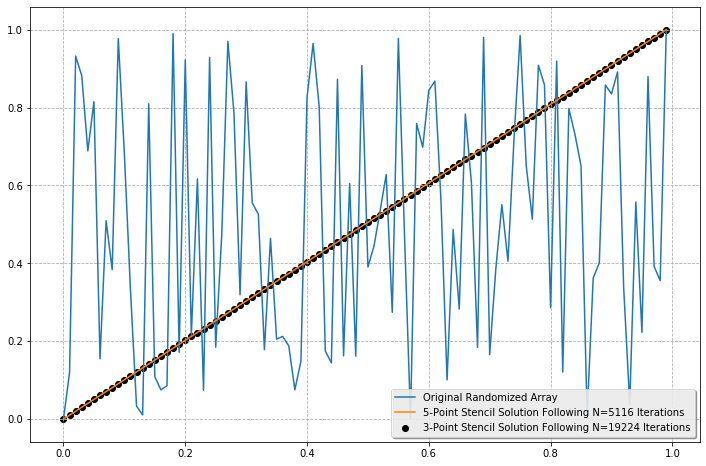

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
#plt.title('Mean Internal E|nergy as a function of T for Ising model')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(xval,yval,label='Original Randomized Array')
plt.plot(xval,yval1,label='5-Point Stencil Solution Following N=' +str(counts1)+ ' Iterations')
plt.scatter(Plot[1],result[0],label='3-Point Stencil Solution Following N=' + str(result[1]) + ' Iterations',color='black')

#Legend Settings
legend = plt.legend(loc = 4, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

And there we have it, the exact same results! Notice how the number of iterations required to reach the solution for the 5-point stencil is much less than that of the 3-point stencil. So if we are able to get it to work, it does have the ability to save us some computational time.

In [0]:
# - The capture command prevents plotting of the additional figure to clean up output -
%%capture 

fig = plt.figure()
#plt.ylim(-5,5)

# Generating initial values
V_vals , X_vals = array_generat3r(100)# Generating the initial random array
array = accurate_derivat3r(V_vals) # Taking the initial derivative

iterations = 2000 # Doing less that ideal number of iterations to shorten plot time
ims = []

for iter in range(iterations): # Going through the expected number of iterations

    derivative = accurate_derivat3r(array) # Taking derivative
    array = derivative # Re-assigning old derivative as the new
    
    if (iter % 100 == 0 or iter<50): # Only plotting every 100th step
        im = plt.plot(xvals,array,color='black')
        ims.append(im)

accurate_ani = animation.ArtistAnimation(fig, ims)

# Here is information to save the figure if wanted 
# ani.save('potential0to1.mp4')
rc('animation', html='html5')

In [0]:
accurate_ani

#### Matrix Method

Now, allow us to use implement the 5-point stencil in the matrix method for the homogeneous differential equation. Now, note that it will be difficult to asses the boundary conditions at the second and second to last point in the matrix because of the $x-2a$ and $x+2a$ terms in the 5-point stencil. As such, we will the 3-point stencil to asses these positions. Now, allow us to define a function that will generate our matrix for us:

In [0]:
def MRTRIX5_Generat3r(N):

  """

  -- General Description --

  This function generates a coefficient matrix for the 5-point stencil.

  -- Arguments --

  N = The NxN size of the matrix

  """

  M = [] # The final matrix we will be returning

  # Generating the first row of the matrix
  r1 = np.zeros(N)
  r1[0] = 1
  M.append(r1)

  # Generating the second second row of the matrix
  r2 = np.zeros(N)
  r2[0],r2[1], r2[2] = 1 , -2 , 1
  M.append(r2)

  # Generating the inbetween rows of the matrix
  r3 = np.zeros(N)
  r3[0], r3[1], r3[2], r3[3], r3[4] = -1, 16, -30, 16, -1 
  M.append(r3)

  for i in range(N-5):
    r = np.roll(r3,1)
    r3 = r
    M.append(r)

  # Generating the second to last row of the matrix
  rN_1 = np.zeros(N)
  rN_1[-3],rN_1[-2], rN_1[-1] = 1 , -2 , 1
  M.append(rN_1)

  # Generating the last row of the matrix
  rN = np.zeros(N)
  rN[-1] = 1
  M.append(rN)

  return M

In [0]:
# testing the function to make sure it works as expected
MRTRIX5_Generat3r(8)

[array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([ -1.,  16., -30.,  16.,  -1.,   0.,   0.,   0.]),
 array([  0.,  -1.,  16., -30.,  16.,  -1.,   0.,   0.]),
 array([  0.,   0.,  -1.,  16., -30.,  16.,  -1.,   0.]),
 array([  0.,   0.,   0.,  -1.,  16., -30.,  16.,  -1.]),
 array([ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.]),
 array([0., 0., 0., 0., 0., 0., 0., 1.])]

As such, allow us to solve the differential equation using Numpy's function to see if we return the expected result:

In [0]:
# Producing Y-values
y_values_acc_lin = np.linalg.solve(MRTRIX5_Generat3r(100),column_v3ctor(100,1))

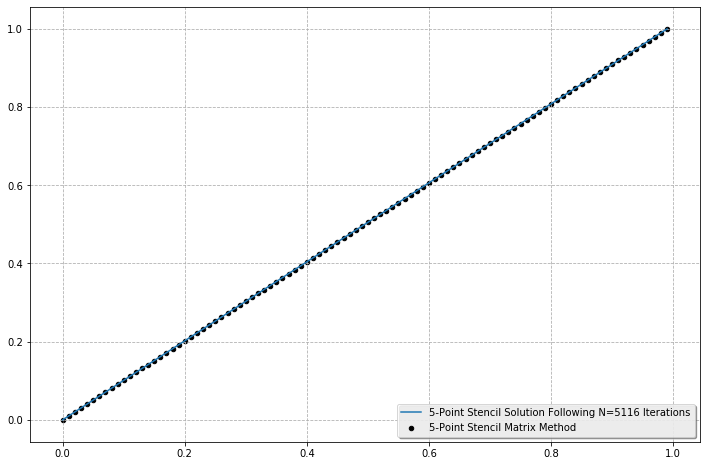

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
#plt.title('Mean Internal E|nergy as a function of T for Ising model')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(xval,yval1,label='5-Point Stencil Solution Following N=' +str(counts1)+ ' Iterations')
plt.scatter(xval,y_values_acc_lin,label='5-Point Stencil Matrix Method',color='black',s=20)

#Legend Settings
legend = plt.legend(loc = 4, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

And there we have it, the Matrix method for the 5-point stencil returns the same results as the iterative method. Again, as in the previous problem the Matrix calculation was much faster. However, the iterative method for the 5-point stencil converges much faster than the 3-point stencil. It is much more irritating to get the 5-point stencil to work, but we get the trade off for computational efficiency and accuracy.

### Part B: Non-Homogeneous Differential Equation

For the linear differential equation, it is possible for us to make the following statement:

$$
f''(x)=\frac{-f(x+2a)+16f(x+a)-30f(x)+16f(x-a)-f(x-2a)}{12a^2} = \rho
$$

And we can re-arrange for $f(x)$ as follows:

$$
f(x) = \frac{-f(x+2a)+16f(x+a)+16f(x-a)-f(x-2a) -12a^2 \rho}{30}
$$

And recall that $\rho$ is given by the following expression:

$$
\rho = 10e^{-100(x-1/2)^2}
$$

Which thereby gives us the final expression:

$$
\boxed{f(x) = \frac{-f(x+2a)+16f(x+a)+16f(x-a)-f(x-2a) -120a^2\left[ e^{-100(x-1/2)^2}\right] }{30}}
$$

#### Iterative Method:

As such, allow us to generate a function that will perform this for us:

In [0]:
def Accurate_Nonlinear_derivat3r(V_initial,X_list):

  """
  -- General Description --

  -- Arguments --

  V_initial  = The random function for which we wish to calculate the derivative

  """

  # Calculating value of "a"
  a = 1/len(V_initial)

  # Values for storage
  V_prime = [] # List following differentiation
  V_prime_smoothed = [] # Smoothed list
  count = 0 # Used to index through our list

  while count < len(V_initial):
    if count == 0: # If we are at the first point in the array append 0 (boundary conditions)
      V_prime.append(0)

    elif count == (len(V_initial)-1): # If we are at last point append 1 (boundary conditions)
      V_prime.append(0)

    elif count == 1:
      averaged1 = (V_initial[count+1] + V_initial[count-1] - (a**2)*(rho(X_list[count])))/2
      V_prime.append(averaged1)

    elif count == (len(V_initial)-2):
      averaged2 = (V_initial[count+1] + V_initial[count-1] - (a**2)*(rho(X_list[count])))/2
      V_prime.append(averaged2)

    elif count >= 2 and count <= (len(V_initial)-3):
      averaged3 = ( 16*V_initial[count+1] + 16*V_initial[count-1] - V_initial[count+2] - V_initial[count-2] - 12*(a**2)*(rho(X_list[count])))/30
      V_prime.append(averaged3)

    count += 1 # Move to the next iteration in the list

  # -- Smoothing the function every 8th step --

  count2 = 0

  while count2 < (len(V_prime)):
    if count2 == 0:
      V_prime_smoothed.append(0)

    elif count2 == (len(V_prime)-1):
      V_prime_smoothed.append(0)
      
    elif count2 >= 1 and count2 <= (len(V_initial)-2):
      smoothed = (V_prime[count2-1] + V_prime[count2+1] + V_prime[count2] - (a**2)*(rho(X_list[count2])))/3
      V_prime_smoothed.append(smoothed)

    count2 += 1

  return V_prime_smoothed

The function below will allow us to perform the smoothing operation for many instances:

In [0]:
def Accurate_Nonlinear_iterat3d_derivat3r(V_initial , X_List, tol):

  """

  -- General Description --

  -- Arguments --

  V_initial = The initial array
  tol = Some tolerance for which the function will stop (total sum of difference
  between old and new derivative)

  """

  array = V_initial
  count = 0

  while count < 100000:
    #print(count)
    derivative = Accurate_Nonlinear_derivat3r(array,X_List)
    test = []

    # testing to see if we can stop running the function:
    for i,j in zip(derivative,array): # Checking the difference between each element
      test.append(np.abs(i-j))
    if sum(test) <  tol: # If the total error is < tol then break
      break

    array = derivative
    count += 1

  return array,count

In [0]:
# Storing values for plotting
Accurate_yvals , counts = Accurate_Nonlinear_iterat3d_derivat3r(yval, xval, 1e-5)

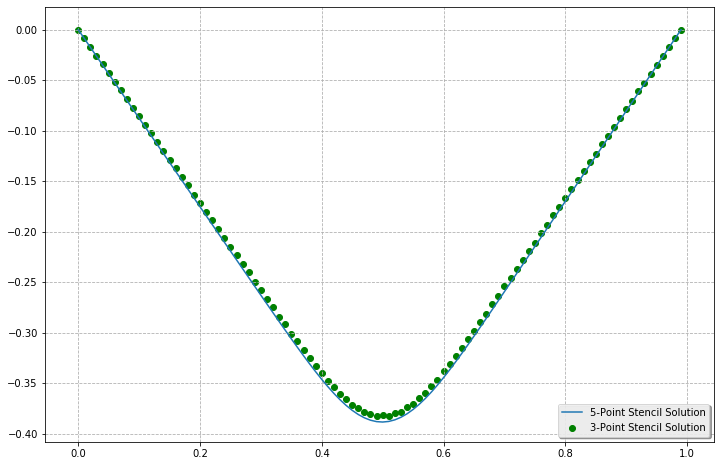

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
#plt.title('Mean Internal E|nergy as a function of T for Ising model')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(xval,Accurate_yvals,label='5-Point Stencil Solution')
plt.scatter(X_vals,Nonlinear_Result,label='3-Point Stencil Solution',color = 'green')

#Legend Settings
legend = plt.legend(loc = 4, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

We will discuss the implications of these results under the matrix method section, but for now allow us to generate an animation for the approach to convergence:

In [0]:
# - The capture command prevents plotting of the additional figure to clean up output -
%%capture 

fig = plt.figure()
#plt.ylim(-5,5)

# Generating initial values
V_vals , X_vals = array_generat3r(100)# Generating the initial random array
array = accurate_derivat3r(V_vals) # Taking the initial derivative

iterations = 5000 # Doing less that ideal number of iterations to shorten plot time
ims = []

for iter in range(iterations): # Going through the expected number of iterations

    derivative = Accurate_Nonlinear_derivat3r(array,X_vals) # Taking derivative
    array = derivative # Re-assigning old derivative as the new
    
    if (iter % 100 == 0 or iter<50): # Only plotting every 100th step
        im = plt.plot(X_vals,array,color='black')
        ims.append(im)

accurate_nolin_ani = animation.ArtistAnimation(fig, ims)

# Here is information to save the figure if wanted 
# ani.save('potential0to1.mp4')
rc('animation', html='html5')

In [0]:
accurate_nolin_ani

#### Matrix Method:

And finally, allow us to attempt this question using the matrix method. Luckily, the 5-point coefficient matrix will remain exactly the same - so all that is left for us to do is re-define the R matrix, that is recall the following system of linear equations:

$$
\begin{pmatrix}
1 & 0 & 0 & 0 &\cdots & 0\cr
1 & -2 & 1& 0 & \cdots & 0\cr
0 & 1 & -2 & 1 & \cdots & 0 \cr
\vdots & \vdots & \vdots & \vdots & \ddots \cr
0 & 0 & 0 & 0 & \cdots & 0\cr
\end{pmatrix} \cdot \begin{pmatrix}
V_1 \cr
V_2 \cr
V_3 \cr
\vdots \cr
V_N
\end{pmatrix} = 12a^2 \begin{pmatrix}
\rho_1 \cr
\rho_2 \cr
\rho_3 \cr
\vdots \cr
\rho_N
\end{pmatrix}
$$

Where we can define the resultant matrix R as:
$$
\begin{pmatrix}
\rho_1 \cr
\rho_2 \cr
\rho_3 \cr
\vdots \cr
\rho_N
\end{pmatrix}
$$

Each value of $\rho$ may be calculated by using the following expression:

$$
\rho(x_i)=10e^{-100(x-1/2)^2}
$$

As such, all we are required to do is to calcuate the R vector, and multiply it by $12a^2$. Lets do it!

In [0]:
# Calculating the coefficient matrix
N = 100
M_nonlin_acc = rho_v3ctor(N,X_vals)

In [0]:
# Calculating the R matrix multiplied by 12a^2
a2_acc = 12*(1/N)**2
Mcorrected_vals_acc = []
for x in M_nonlin_acc:
  M_non_corrected = x*a2_acc
  Mcorrected_vals_acc.append(M_non_corrected)

In [0]:
# Producing Y-values
y_values_acc_nolin = np.linalg.solve(MRTRIX5_Generat3r(100),Mcorrected_vals_acc)

And finally, allow us to plot the (extremely quick) matrix method vs the (relatively slow) 5-point method below:

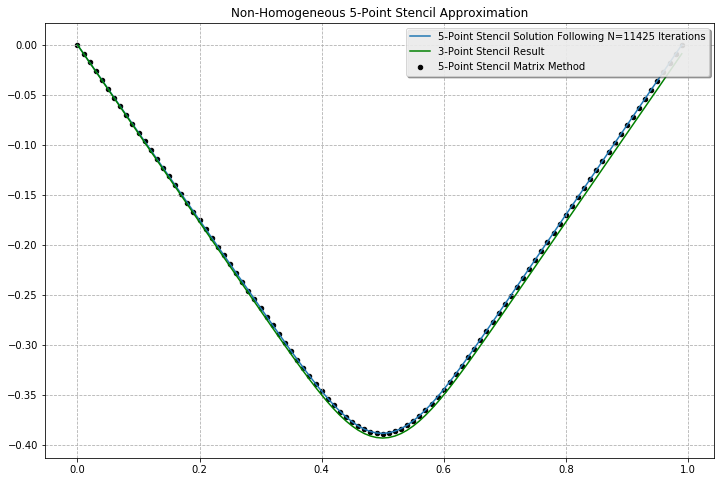

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
#plt.xlabel('T')
#plt.ylabel('U(T)')
plt.title('Non-Homogeneous 5-Point Stencil Approximation')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(xval,Accurate_yvals,label='5-Point Stencil Solution Following N=' +str(counts)+ ' Iterations')
plt.scatter(X_vals,y_values_acc_nolin,label='5-Point Stencil Matrix Method',color='black',s=20)
plt.plot(X_vals,expected_vals,label='3-Point Stencil Result',color='green')

#Legend Settings
legend = plt.legend(loc = 1, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

Now, initially we may think "whoah, this is a big problem that the plots don't match up". Although it is a problem, it is not the end of the world. This is just showing that the iterative of 'pump-n-dump' method is fairly problematic, and requires lots of manipulation to work effectively. Through this problem we have showed that the matrix method is much stronger than the iterative method, as it is not only quickly but is also more accurate.

# Problem 5

Consider again the inhomogeneous Poisson equation above, with the same boundary conditions and source term as in Problem 3, but now using the Fourier trick. Solve the problem by utilizing a canned linear systems solver using the matrix $M$, and by direct inversion of the matrix. Repeat the calculation by instead solving for $r(n)$. Compare the solutions with those obtained in Problem 3. Why do you think that the results are so off? What do you think would fix the situation?

### Part A - Calculating $\phi$ with the Matrix $M$

The first way we can solve this problem is by producing the matrix M; which is given by the following:

$$M=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2e^{i 2\pi}\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2e^{i 4\pi}\cr
\vdots & \vdots & \ddots & \vdots\cr
e^{i 2\pi} & 4e^{i 4\pi} & \cdots & N^2e^{i 2\pi N}\cr
\end{pmatrix}
=\frac{1}{\sqrt{N}}\begin{pmatrix}
e^{i 2\pi/N} & 4e^{i 4\pi/N} & \cdots & N^2\cr
e^{i 4\pi/N} & 4e^{i 8\pi/N} & \cdots & N^2\cr
\vdots & \vdots & \ddots & \vdots\cr
1 & 4 & \cdots & N^2\cr
\end{pmatrix}.$$

and using it to isolate for $\phi$ in the following equation:

$$
\phi = M \rho
$$

And $\rho$ is a column vector given by the following:

$$
\left( \frac{L}{2\pi}\right)^2\begin{pmatrix}
\rho(0) \cr
\rho(1) \cr
\vdots \cr
\rho(N-1) \cr
\end{pmatrix}
$$

Where each entry in the column matrix is given by:




As such, allow us to start by constructing the matrix M. This can be done with the following function:

In [0]:
def MRTRIXF_Generat3r(N):

  """

  -- General Description --

  This function creates the coefficient matrix as described above.

  -- Arguments --
  N = The NxN size of the coefficient matrix

  """

  Matrix = []
  for col in range(1,(N+1),1):
    row_N = [] # Used for the initial row prior to diving by the square root
    row_sqrtN = [] # Used to store values containing the square root term
    for row in range(1,(N+1),1): # Ranging from 1-N
      #print(val)
      row_entry = (row**2)*np.exp( (1j*2*col*row*np.pi)/N )
      #print(row_entry)
      row_N.append(row_entry)

    # Here I am accounting for the factor of sqrt(N) 
    for i in row_N:
      row_sqrtN.append(i/np.sqrt(N))

    # Appending the proper row to our final matrix
    Matrix.append(row_sqrtN)

  return Matrix

In [0]:
# Checking if the function works as expected
MRTRIXF_Generat3r(3)

[[(-0.2886751345948128+0.5000000000000001j),
  (-1.1547005383792528-1.9999999999999996j),
  (5.196152422706633-1.2726902864698884e-15j)],
 [(-0.2886751345948132-0.4999999999999999j),
  (-1.15470053837925+2.0000000000000013j),
  (5.196152422706633-2.5453805729397768e-15j)],
 [(0.5773502691896258-1.414100318299876e-16j),
  (2.3094010767585034-1.1312802546399008e-15j),
  (5.196152422706633-3.8180708594096646e-15j)]]

Now, before we can do our matrix inversion and determine $\phi$ allow us to generate our $\rho$ vector. Please note that the value for x in each entry will be equivalent to 1,2,...,N. As such, we find that:

In [0]:
# Generating x-values
N = 100
xvals_rho = []
for i in range(1,(N+1),1):
  xvals_rho.append(i/100)

In [0]:
# Generating the rho column vector we find:
L = 1
rho_vec = [] #Rho column vector that will be used for plotting
rho_vec_vals = rho_v3ctor(N,xvals_rho)

for rho_i in rho_vec_vals: # multiplying all entries of the vector by the defined constant
  rho_vec.append(-1*(L/(2*np.pi))**2*rho_i)

And finally, allow us to invert our coefficeint matrix and then solve the system of linear equations. Upon which we can plot our result. We will start by using mupy's linalg solving function upon which we will attempt to invert the matrix and multiply it by $\rho$:

In [0]:
Matrix_100 = MRTRIXF_Generat3r(100)
Results_canned = np.linalg.solve(Matrix_100, rho_vec)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


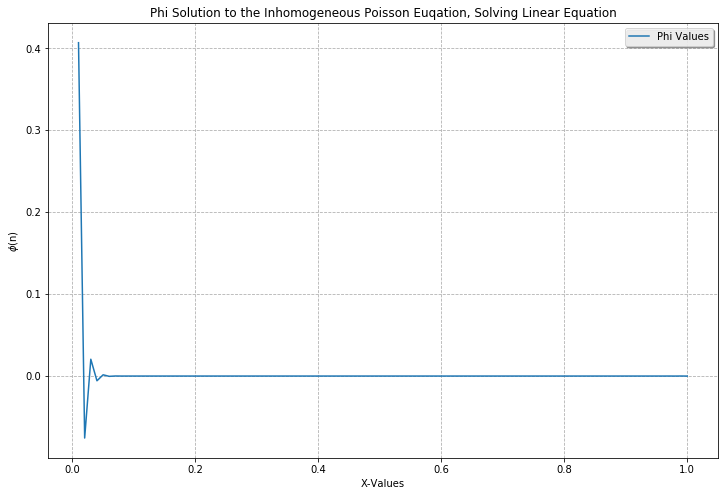

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
plt.xlabel('X-Values')
plt.ylabel('$\phi$(n)')
plt.title('Phi Solution to the Inhomogeneous Poisson Euqation, Solving Linear Equation')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(xvals_rho,Results_canned,label='Phi Values')


#Legend Settings
legend = plt.legend(loc = 1, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

Now, we are required to calculate and plot the potential $V(j)$ as a function of x. We can do this by the following:

$$
V(j)=\frac{1}{\sqrt{N}}\sum_ne^{i 2\pi nj/N}\phi(n)
$$

As such, allow us to write a function that will perform this operation for us:

In [0]:
def V_calc3r(results,N):

  """

  -- General Description --

  This function utilizes the equation above to calculate the potential of the system

  -- Arguments -- 

  results = The result array for phi
  N = The number of iterations from 0 to 1 or the size of your NxN matrix

  """

  V_final = []
  for j in range(1,(len(results)+1)): # Moving from J 1 to N as described in the notes
    V_j = []
    for n in range(1,101):
      V = (1/np.sqrt(N))*(np.exp( (1j*2*np.pi*n*j)/N ))*results[n-1]
      V_j.append(V)

    V_summed = sum(V_j)
    V_final.append(V_summed)

  return V_final

In [0]:
# Storing values for plotting
V_final = V_calc3r(Results_canned,100)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


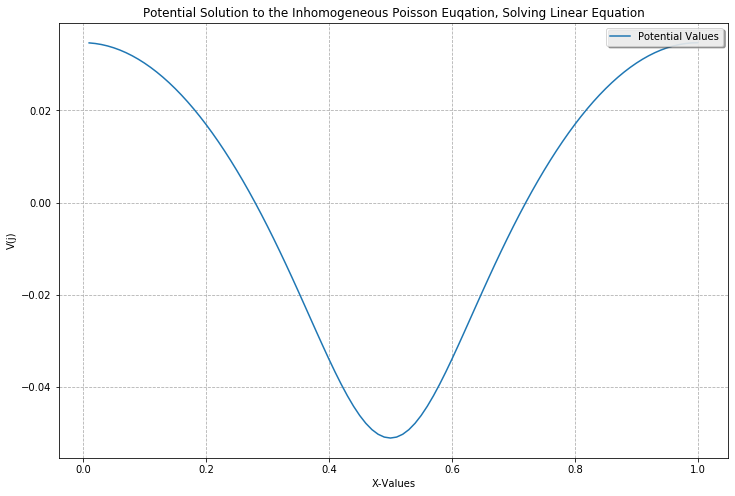

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
plt.xlabel('X-Values')
plt.ylabel('V(j)')
plt.title('Potential Solution to the Inhomogeneous Poisson Euqation, Solving Linear Equation')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(xvals_rho,V_final,label='Potential Values')


#Legend Settings
legend = plt.legend(loc = 1, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

And solving for $\phi$ by using the following expression:

$$
\phi = M^{-1}\rho
$$

In [0]:
# Calculating our values necessary for plotting
Inverted = np.linalg.inv(Matrix_100)
phi = np.matmul(Inverted,rho_vec) # Performing our matrix multiplication

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


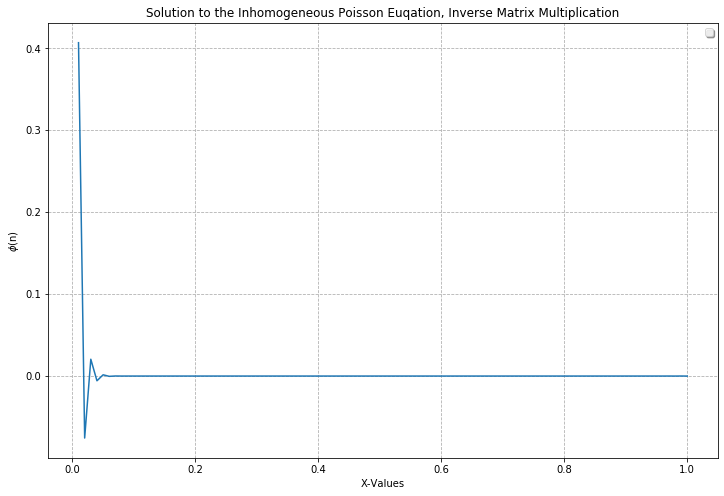

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
plt.xlabel('X-Values')
plt.ylabel('$\phi$(n)')
plt.title('Solution to the Inhomogeneous Poisson Euqation, Inverse Matrix Multiplication')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(xvals_rho,phi,label='')


#Legend Settings
legend = plt.legend(loc = 1, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

And finally, calculating the potential values we find:

In [0]:
V_final_mult = V_calc3r(phi,100)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


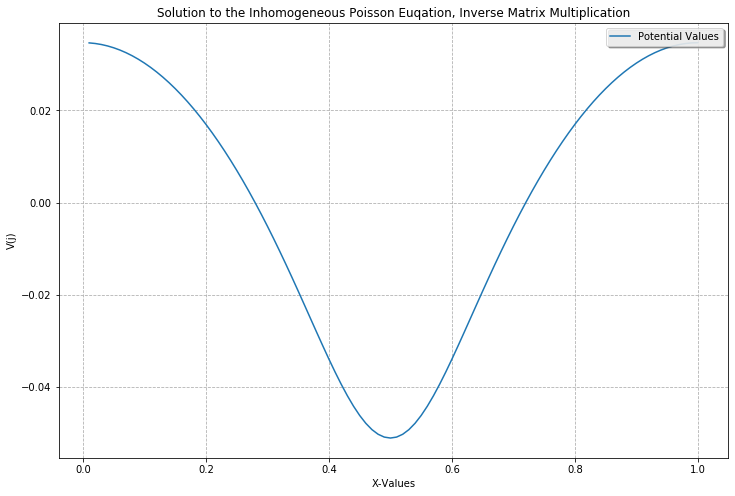

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
plt.xlabel('X-Values')
plt.ylabel('V(j)')
plt.title('Solution to the Inhomogeneous Poisson Euqation, Inverse Matrix Multiplication')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(xvals_rho,V_final_mult,label='Potential Values')


#Legend Settings
legend = plt.legend(loc = 1, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

### Part B - Using $r(n)$ to Calculate V

We can now calculate $V(j)$ from $r(n)$ by using the following set of equations. We will first calculate $r(n)$ using the following equation:

$$
r(n)=\frac{1}{\sqrt{N}}\sum_je^{-i 2\pi nj/N}\rho(j)
$$

Which we can then calculate $\phi$ through use of the following equation:

$$
\phi(n)=-\left(\frac{L}{2\pi n}\right)^2r(n)
$$

Which we can ultimately use to calculate V(j), through the following equation (which is the exact same as in part A of this problem):

$$
V(j)=\frac{1}{\sqrt{N}}\sum_ne^{i 2\pi nj/N}\phi(n)
$$

As such, allow us to define a function that will calculate r(n).

In [0]:
def r_calc3r(rho_list,N):

  """

  -- General Description --

  This function uses the above definition for r(n) to calculate values necessary
  for the calculation of phi(n) and ultiamtely V(j).

  -- ARguments --

  rho_list = List of rho values to be used for this calculation
  N = The number of lattice spacings (between 0 and 1)

  """

  r_final = []

  for n in range(1,101):
    r_n = []
    for j in range(1,(len(rho_list)+1)):
      r = (1/np.sqrt(N))*(np.exp((-2*1j*np.pi*j*n)/N))*rho_list[j-1]
      r_n.append(r)
    r_summed = sum(r_n)
    r_final.append(r_summed)

  return r_final

And we can use this to calculate our r-values as follows:

In [0]:
# Note that we are are using the original rho column vector here
r_vals = r_calc3r(rho_vec_vals,100)

And now, the following function will be used to calculate our values for $\phi$.

In [0]:
def phi_calc3r(r_vals,L):

  """

  -- General Description --

  Calculate a given value for phi for a passed value of r and L.

  -- Arguments --
  
  r_vals = A list for r_vals for which you wish to calculate phi
  L = The range (length) of your lattice

  """

  phi_values = []
  
  for n in range(1,(len(r_vals)+1)):
    phi = -1*((L/(2*np.pi*n))**2)*r_vals[n-1]
    phi_values.append(phi)

  return phi_values

In [0]:
phi_values = phi_calc3r(r_vals,1)

And finally, we can pass these to the V function that we defined above to calculate the respective values for V:

In [0]:
# Storing values for plotting
V_results_r = V_calc3r(phi_values,100)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


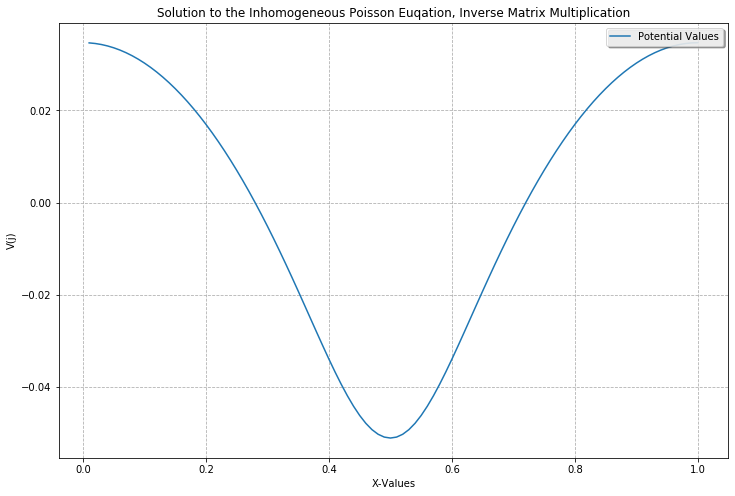

In [0]:
#Plotting Labels
plt.figure(figsize=(12,8))
plt.xlabel('X-Values')
plt.ylabel('V(j)')
plt.title('Solution to the Inhomogeneous Poisson Euqation, Inverse Matrix Multiplication')
plt.grid(linestyle='dashed')

#Plot the Function
plt.plot(xvals_rho,V_results_r,label='Potential Values')


#Legend Settings
legend = plt.legend(loc = 1, shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

Luckily, all three of our approaches to find a solution returned the same results! however, as we can notice they are way off our results in previous sections of the assignment (in both the general shape of the plot and in terms of the peak of the plot as well). 

### Why are the results so off? What do you think would fix the situation?

Throughout this procedure there was no mention of boundary conditions (which were imperitive in the earlier sections). It may be the lack of information regarding the boundary conditions has caused this approximation to struggle. A fix may be to include the boundary conditions in our derivation!

## Question 5 Appendix

In [0]:
# Not getting expected results... (May be a problem with np.imag)
N = 10
row1 = []
for val in range(1,(N+1),1): # Ranging from 1-N
  #print(val)
  row_entry = (val**2)*np.exp( (1j*2*val*np.pi)/N )
  #print(row_entry)
  row1.append(row_entry)

In [0]:
print(row1)

[(0.8090169943749475+0.5877852522924731j), (1.2360679774997898+3.804226065180614j), (-2.781152949374526+8.559508646656383j), (-12.944271909999157+9.404564036679572j), (-25+3.061616997868383e-15j), (-29.124611797498112-21.16026908252903j), (-15.141832724372431-46.60176929846252j), (19.777087639996623-60.86761704288983j), (65.53037654437074-47.610605435690346j), (100-2.4492935982947064e-14j)]


In [0]:
# Not getting expected results... (May be a problem with np.imag)
N = 10
Matrix = []
for row in range(1,(N+1),1):
  row_N = []
  for col in range(1,(N+1),1): # Ranging from 1-N
    #print(val)
    row_entry = (col**2)*np.exp( (1j*2*col*row*np.pi)/N )
    #print(row_entry)
    row_N.append(row_entry)
  Matrix.append(row_N)

In [0]:
print(Matrix)

[[(0.8090169943749475+0.5877852522924731j), (1.2360679774997898+3.804226065180614j), (-2.781152949374526+8.559508646656383j), (-12.944271909999157+9.404564036679572j), (-25+3.061616997868383e-15j), (-29.124611797498112-21.16026908252903j), (-15.141832724372431-46.60176929846252j), (19.777087639996623-60.86761704288983j), (65.53037654437074-47.610605435690346j), (100-2.4492935982947064e-14j)], [(0.30901699437494745+0.9510565162951535j), (-3.2360679774997894+2.351141009169893j), (-7.281152949374528-5.290067270632258j), (4.944271909999156-15.216904260722458j), (25-6.123233995736766e-15j), (11.124611797498119+34.238034586625524j), (-39.641832724372414+28.801477362331195j), (-51.77708763999665-37.61825614671826j), (25.030376544370707-77.03557781990746j), (100-4.898587196589413e-14j)], [(-0.30901699437494734+0.9510565162951536j), (-3.2360679774997902-2.351141009169892j), (7.281152949374526-5.29006727063226j), (4.944271909999164+15.216904260722456j), (-25+9.184850993605149e-15j), (11.12461179

Now, before we can do our matrix inversion and determine $\phi$ allow us to generate our $\rho$ vector. Please note that the value for x in each entry will be equivalent to 1,2,...,N. As such, we find that:

In [0]:
# Generating x-values
N = 100
xvals_rho = []
for i in range(1,(N+1),1):
  xvals_rho.append(i)

In [0]:
rho_vec = rho_v3ctor(N,xvals_rho)
print(rho_vec)

[1.3887943864964022e-10, 1.9219477278238491e-97, 3.6808558548018e-271, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [0]:
simport math
np.exp(np.pi * 1j) + 1